# 机器学习之线性回归

#### 【简介】

**线性回归**是属于机器学习里面的**监督学习**，与分类问题不同的是，在回归问题中，其目标是通过对训练样本的学习，得到从样本**特征到样本标签直接的映射**，其中，在回归问题中，**样本的标签是连续值**。线性回归是一类重要的回归问题。在线性回归中，**目标值与特征直接存在线性关系**。

#### 【目录】

1. [简单线性回归与多元线性回归](#1.-衡量线性回归的性能指标)
2. [衡量线性回归的性能指标](#2.-衡量线性回归的性能指标)
3. [scikit-learn线性回归实战-波斯顿房价预测](#3.-scikit-learn线性回归实战-波斯顿房价预测)


## 1. 简单线性回归与多元线性回归

### 简单线性回归

在生活中，我们常常能碰到这么一种情况，一个变量会跟着另一个变量的变化而变化，如圆的周长与半径的关系，当圆的半径确定了，那么周长也就确定了。还有一种情况就是，两个变量之间看似存在某种关系，但又没那么确定，如青少年的身高与体重存在一种近似的线性关系：`身高/cm = 体重/kg + 105`

但是，并不是每个青少年都符合这个公式，只能说每个青少年的身高体重都存在这么一种**近似的线性关系**。这就是其实就是**简单的线性回归**，那么，到底什么是线性回归呢？假如我们将青少年的身高和体重值作为坐标，不同人的身高体重就会在平面上构成不同的坐标点，然后用一条直线，尽可能的去拟合这些点，这就是简单的线性回归。

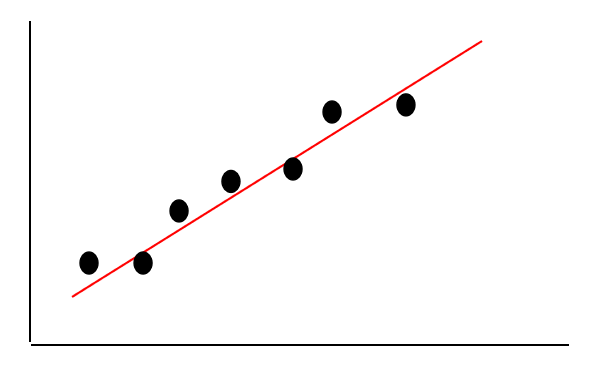

简单线性回归模型如下：

$$
 y = wx + b
$$

其中，$x$表示特征值(如：体重值)，$w$表示权重，$b$表示偏置，$y$表示标签(如：身高值)

### 多元线性回归

简单线性回归中，一个变量跟另一个变量的变化而变化，但是生活中，还有很多变量，可能由多个变量的变化决定着它的变化，比如房价，影响它的因素可能有：房屋面积、地理位置等等。如果我们要给它们建立出近似的线性关系，这就是多元线性回归，多元线性回归模型如下：

$$
y = b + w_1x_1 + w_2x_2 + ... + w_nx_n
$$

其中$x_i$表示第i个特征值，$w_i$表示第i个特征对应的权重，$b$表示偏置，$y$表示标签。

### 任务描述

构建线性回归算法，并利用波斯顿房价数据对模型进行训练，然后对未知的房价数据进行预测。

### 相关知识

为了完成本任务，需要掌握：

1. 线性回归训练流程
2. 线性回归的正规方程解

#### 数据集介绍

波斯顿房价数据集共有506条波斯顿房价的数据，每条数据包括对指定房屋的13项数值型特征和目标房价组成。本任务用数据集的80%作为训练集，数据集的20%作为测试集，训练集和测试集中都包括特征和目标房价。

sklearn中已经提供了波斯顿房价数据集的相关接口，想要使用该数据集可以使用如下代码：

In [3]:
from sklearn import datasets
#加载波斯顿房价数据集
boston = datasets.load_boston()
#X表示特征，y表示目标房价
X = boston.data
y = boston.target

数据集中部分数据与标签如下：

In [2]:
import pandas as pd

df_boston = pd.DataFrame(boston.data, columns = boston.feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
df_boston['target'] = pd.Series(boston.target)

In [4]:
df_boston.head().T

,0,1,2,3,4
CRIM,0.00632,0.02731,0.02729,0.03237,0.06905
ZN,18.00000,0.00000,0.00000,0.00000,0.00000
INDUS,2.31000,7.07000,7.07000,2.18000,2.18000
CHAS,0.00000,0.00000,0.00000,0.00000,0.00000
NOX,0.53800,0.46900,0.46900,0.45800,0.45800
RM,6.57500,6.42100,7.18500,6.99800,7.14700
AGE,65.20000,78.90000,61.10000,45.80000,54.20000
DIS,4.09000,4.96710,4.96710,6.06220,6.06220
RAD,1.00000,2.00000,2.00000,3.00000,3.00000
TAX,296.00000,242.00000,242.00000,222.00000,222.00000


#### 线性回归训练流程

由数据集可以知道，每一个样本有13个特征与目标房价，而我们要做的事就是通过这13个特征来预测房价，我们可以构建一个多元线性回归模型，来对房价进行预测。模型如下：

$$
y = b + w_1x_1 + w_2x_2 + ... + w_nx_n
$$

其中$x_i$表示第i个特征值，$w_i$表示第$i$个特征对应的权重，$b$表示偏置，$y$表示目标房价。

为了方便，我们稍微将模型进行变换：

$$
y = w_0x_0 + w_1x_1 + w_2x_2 + ... + w_nx_n
$$

其中$x_0$等于1， 即：

$$
Y = \theta X
$$

其中， 
$$
\theta = (w_0, w_1, ..., w_n)
$$

$$
X = (1, x_1, ..., x_n)
$$


而我们的目的就是找出能够正确预测的**多元线性回归模型**，即找出正确的参数$\theta$。那么如何寻找呢？通常在监督学习里面都会构造一个**损失函数**，用来**衡量真实值与预测值之间的差异**，然后将问题转化为**最优化损失函数**。既然损失函数是用来衡量真实值与预测值之间的差异那么很多人自然而然的想到了用所有真实值与预测值的差的绝对值来表示损失函数。不过带绝对值的函数不容易求导，所以采用**MSE(均方误差)作为损失函数**，公式如下：

$$
loss = \frac{1}{m}\sum_{i=1}^m(y^i - p^i)^2
$$

其中$p$表示预测值，$y$表示真实值，$m$为样本总个数，$i$表示第$i$个样本。最后，我们再使用正规方程解来求得我们所需要的参数。

线性回归模型训练流程如下:

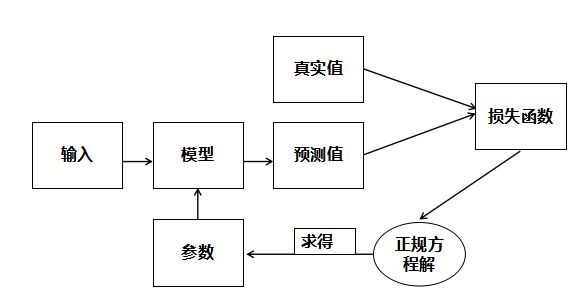

#### 线性回归的正规方程解

对线性回归模型，假设训练集中$m$个训练样本，每个训练样本中有$n$个特征，可以使用矩阵的表示方法，预测函数可以写为：

$$
Y=\theta X
$$

其损失函数可以表示为:

$$
(Y - \theta X)^T(Y - \theta X)
$$

其中，标签$Y$为$m \times 1$的矩阵，训练特征$X$为$m \times (n+1)$的矩阵，回归系数$\theta$为$(n+1) \times 1$的矩阵，对$\theta$求导，并令其导数等于0，可以得到$X^T(Y − \theta X)=0$。所以，最优解为：

$$
\theta = (X^TX)^{-1}X^TY
$$

这就是正规方程解，可以通过**最优方程解**直接求得我们所需要的参数。

### 实操练习

#### 编程要求

根据提示，在补充下列 Python 代码，实现**线性回归算法**与**MSE损失函数**计算方法，并利用房价数据对模型进行**训练**，然后对未知的房价数据进行**预测**。

#### 测试说明

预测结果的MSE低于30，模型性能达标，否则为不达标。

In [1]:
import numpy as np

def mse_score(y_pred, y_test):
    '''
    输入: y_pred(ndarray):预测值
         y_test(ndarray):真实值
    输出: mse(float):mse损失函数值
    '''
    #********* Begin *********#
    mse = np.mean((y_pred - y_test) ** 2)
    #********* End *********#
    return mse

class LinearRegression:
    
    def __init__(self):
        '''初始化线性回归模型'''
        self.theta = None
        
    def fit(self, X_train, y_train):
        '''
        输入: X_train(ndarray):训练样本
             y_train(ndarray):训练标签
        输出: 拟合后的参数
        '''
        #********* Begin *********#
        ones = np.ones((len(X_train), 1))
        X = np.hstack([ones, X_train])
        self.theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y_train)
        #********* End *********#
        return self.theta
    
    def predict(self, X_test):
        '''
        输入: X_test(ndarray):测试样本
        输出: 预测结果
        '''
        #********* Begin *********#
        X = np.hstack([np.ones((len(X_test), 1)), X_test])
        return X.dot(self.theta)
        #********* End ***********#

In [4]:
# 直接拆分训练集（80%）和测试集（20%）
split_index = int(X.shape[0] * 0.8)
X_train, y_train = X[:split_index], y[:split_index]
X_test,  y_test = X[split_index:], y[split_index:]
# 创建模型
LR = LinearRegression()
# 拟合数据（训练）
LR.fit(X_train, y_train)
# 模型预测
y_pred = LR.predict(X_test)
# 评价模型
mse_s = mse_score(y_pred, y_test)
if  mse_s <= 30:
    print('MSE = {:.2f} < 30, 模型性能已达标.'.format(mse_s))
else:
    print('MSE = {:.2f} > 30, 模型性能未达标!'.format(mse_s))

MSE = 32.80 > 30, 模型性能未达标!


上述代码直接划分数据集的方式不科学，使用sklearn.model_selection的train_test_split()函数划分数据集更能客观地评价模型。

In [5]:
from sklearn.model_selection import train_test_split
# 划分数据集为训练集与测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.2, random_state=12
)
# 创建模型
LR = LinearRegression()
# 拟合数据（训练）
LR.fit(X_train, y_train)
# 模型预测
y_pred = LR.predict(X_test)
# 评价模型
mse = mse_score(y_pred, y_test)
if  mse <= 30:
    print('MSE = {:.2f} < 30, 模型性能已达标.'.format(mse))
else:
    print('MSE = {:.2f} > 30, 模型性能未达标!'.format(mse))

MSE = 20.56 < 30, 模型性能已达标.


## 2. 衡量线性回归的性能指标

### 任务描述

用Python实现线性回归常用**评估指标**，并对构造的线性回归模型进行评估。

### 相关知识

为了完成本任务，需要掌握的知识点：

1. 均方误差(MSE)
2. 均方根误差(RMSE)
3. 平均绝对误差(MAE)
4. R-Squared

机器学习通常都是将训练集上的数据对模型进行训练，然后再将测试集上的数据给训练好的模型进行预测，最后根据模型性能的好坏选择模型，对于**分类**问题，我们容易想到，可以使用**正确率**来评估模型的性能，那么回归问题可以使用哪些指标用来评估呢？

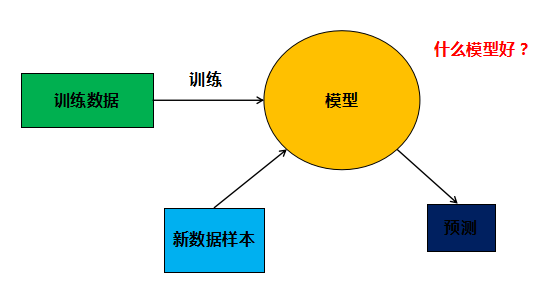

#### MSE

**MSE** （Mean Squared Error）叫做**均方误差**，公式如下：

$$
MSE = \frac{1}{m}\sum_{i=1}^m(y^i - p^i)^2
$$

其中$y^i$表示第$i$个样本的真实标签，$p^i$表示模型对第i个样本的预测标签。线性回归的**目的**就是让**损失函数最小**。那么模型训练出来了，我们**在测试集上用损失函数来评估模型**就行了。

#### RMSE

**RMSE**（Root Mean Squard Error）即**均方根误差**，公式如下：

$$
RMSE = \sqrt{\frac{1}{m}\sum_{i=1}^m(y^i - p^i)^2}
$$

RMSE其实就是MSE开个根号。有什么意义呢？其实实质是一样的，只是对数据的描述更好。

例如：要做房价预测，每平方是万元，我们预测结果也是万元。如果差值的平方单位是千万级别的，那就不太好描述自己做的模型效果。如模型误差是多少千万？。于是干脆开个根号，误差的结果就跟我们数据是同一个级别了。如在描述模型的时候就说，我们模型的误差是多少万元。

#### MAE

**MAE**（Mean Absolute Error）即**平均绝对误差**，公式如下：

$$
MAE = \frac{1}{m}\sum_{i=1}^m|y^i - p^i|
$$

MAE虽然不作为损失函数，确是一个非常直观的评估指标，它表示每个样本的预测标签值与真实标签值的**L1**距离。

#### R-squared

上面的几种衡量标准针对不同的模型会有不同的值。比如说预测房价,那么误差单位就是万元。数子可能是3，4，5之类的。那么预测身高就可能是0.1，0.6之类的。没有什么可读性，到底多少才算好呢？不知道，那要根据模型的应用场景来看。分类算法的衡量标准就是正确率，而正确率又在0～1之间，最高百分之百。最低0。如果是负数，则考虑非线性相关。很直观，而且不同模型一样的。那么线性回归有没有这样的衡量标准呢？

**R-Squared**就是这么一个指标，公式如下：

$$
R^2 = 1 - \frac{\sum_i(p^i - y^i)^2}{\sum_i(y_{mean}^i - y^i)^2}
$$

其中$y_{mean}$表示所有测试样本标签值的均值。为什么这个指标会有刚刚我们提到的性能呢？分析一下公式：

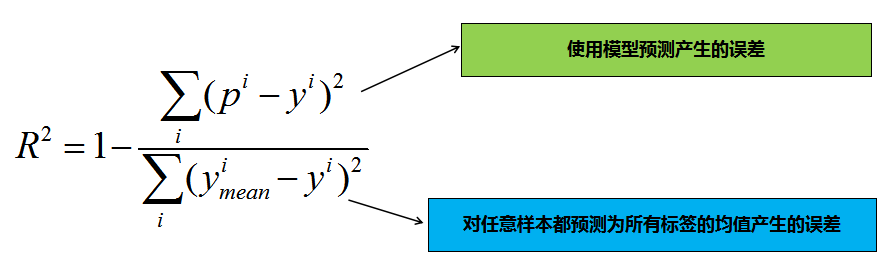

其实**分子**表示的是模型**预测**时产生的**误差**，**分母**表示的是对任意样本都预测为所有**标签均值**时产生的**误差**，由此可知：

1. $R^2 \leq 1$，当我们的模型不犯任何错误时，取最大值1
2. 当我们的模型性能跟基模型性能（预测为均值）相同时，取0
3. 如果为负数，则说明我们训练出来的模型还不如基准模型，此时，很有可能我们的数据不存在任何线性关系

### 实操练习

#### 编程要求

根据提示，在下列代码的Begin-End处补充代码，用Python实现R-Squared指标，并用实现的R-Squared指标来评估前面的线性回归模型。

#### 测试说明

R-Squared指标高于0.6，模型性能达标，否则为不达标。

In [31]:
import numpy as np

# R-Squared
def r2_score(y_pred, y_test):
    '''
    输入: y_predict(ndarray):预测值
          y_test(ndarray):真实值
    输出: r2(float):r2值
    '''
    #********* Begin *********#
    r2 = 1 - mse_score(y_pred, y_test) / np.var(y_test)
    #********* End *********#
    return r2

In [33]:
# 使用R-Squared评价模型
r2 = r2_score(y_pred, y_test)
if r2 > 0.6:
    print('R2 = {:.2f} > 0.6, 模型性能已达标.'.format(r2))
else:
    print('R2 = {:.2f} < 0.6, 模型性能未达标!'.format(r2))

R2 = 0.75 > 0.6, 模型性能已达标.


## 3. scikit-learn线性回归实战-波斯顿房价预测

### 任务描述

使用**sklearn**中的**线性回归模型**，并通过**波斯顿房价数据集**中房价的13种属性与目标房价对线性回归**模型**进行**训练**，并对房价进行**预测**。

### 相关知识

#### LinearRegression

**LinearRegression**的**构造方法**中有两个常用的参数可以设置：

- **`fit_intercept`**：是否有**截距**，如果没有则直线过原点，默认为True。
- **`normalize`**：是否将数据**归一化**，默认为False。

**LinearRegression**类中的**`fit`** 方法用于**训练模型**，fit函数有两个向量输入：

- **`X`**：大小为**`(样本数量,特征数量)`** 的ndarray，存放**训练样本**
- **`Y`**：值为整型，大小为**`(样本数量,)`** 的ndarray，存放训练样本的**标签值**

**LinearRegression**类中的**`predict`** 方法用于**预测**，返回预测值，predict函数有一个向量输入：

- **`X`**：大小为**`(样本数量,特征数量)`** 的ndarray，存放**测试样本**

LinearRegression的使用代码如下：

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred[:5]

array([ 5.88679928,  3.78705697,  6.64054968, 21.31276497, 15.41271412])

### 实操练习

#### 编程要求

补全下列Begin和End之间的Python代码，使用**sklearn**构建**线性回归模型**，利用**sklearn**提供的**波士顿房价数据集**的前**80%** 作为**训练集**数据与训练标签对模型进行**训练**，然后使用训练好的模型对数据集的剩余**20%** 作为**测试集**数据进行**预测**，并将预测结果保存到**`./data/result-boston.csv`** 中。保存格式如下：

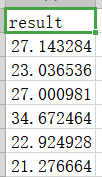

#### 测试说明

要求：R2指标高于0.6

In [34]:
#********* Begin *********#
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
#加载波斯顿房价数据集
boston = datasets.load_boston()
# X表示特征，y表示目标房价
# 拆分训练(80%)与测试集(20%)
split_index = int(0.8 * boston.data.shape[0])
X_train, y_train = boston.data[:split_index], boston.target[:split_index]
X_test, y_test = boston.data[split_index:], boston.target[split_index:]
# 创建模型
lr = LinearRegression()
#训练模型
lr.fit(X_train,y_train)
#获取预测标签
y_pred = lr.predict(X_test)
#将预测标签写入csv
df = pd.DataFrame({'result':y_pred}) 
df.to_csv('./data/result-boston.csv', index=False)
#********* End *********#

In [35]:
!head -n 7 ./data/result-boston.csv

result
5.886799282181428
3.7870569729086476
6.640549683431075
21.312764974873993
15.412714122137173
23.652297562693878


In [36]:
# 使用R-Squared评价模型
r2 = r2_score(y_pred, y_test)
if r2 > 0.6:
    print('R2 = {:.2f} > 0.6, 模型性能已达标.'.format(r2))
else:
    print('R2 = {:.2f} < 0.6, 模型性能未达标!'.format(r2))

R2 = -0.22 < 0.6, 模型性能未达标!


影响模型性能的因素很多，其中数据集分布的影响很大。若数据集的分布不均匀，直接进行划分会导致模型在测试集的表现较差。下面使用sklearn.model_selection模块的train_test_split函数划分数据集，该函数在划分数据集之前会对数据集进行随机重排（shuffle），使数据集的分布均匀。

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.2, random_state=12
)

# 创建模型
lr = LinearRegression()
#训练模型
lr.fit(X_train,y_train)
#获取预测标签
y_pred = lr.predict(X_test)

r2 = r2_score(y_pred, y_test)
if r2 > 0.6:
    print('R2 = {:.2f} > 0.6, 模型性能已达标.'.format(r2))
else:
    print('R2 = {:.2f} < 0.6, 模型性能未达标!'.format(r2))

R2 = 0.75 > 0.6, 模型性能已达标.


因此，数据集必须均匀分布，才能训练出泛化能力（性能）更强的模型。